In [1]:
from pylab import np
import matplotlib.pyplot as plt

In [135]:
N = 8000 # number of steps
tau = 25.0 # time interval [s]
dt = tau/float(N-1) # time step [s]
t = np.linspace(0, tau, N) # Nx1 evenly spaced t_i time array
theta = np.zeros([N,2]) # Nx2 array (N rows, 2 columns) for y_i, v_i state

In [136]:
def rk4(y, t, dt, derivs): # rk4 method y_i -> y_i+1
    k1 = dt * derivs(y, t)
    k2 = dt * derivs(y + k1 / 2., t + dt / 2.)
    k3 = dt * derivs(y + k2 / 2., t + dt / 2.)
    k4 = dt * derivs(y + k3, t + dt)
    y_next = y + (k1 + 2.*k2 + 2.*k3 + k4) / 6.
    return y_next

In [137]:
def pendulum( y, t): 
    diff0 = y[1] # dtheta/dt = omega
    diff1 = -(g/L)*np.sin(y[0]) 
    diff1 -= 2.*beta*y[1] # domega/dt = −(g/L)*sin(theta)
    diff1 += F/(m*L)*np.cos(omega_F*t)
    return np.array([diff0, diff1])

In [152]:
g = 9.8 # grav. acceleration [m/s^2]
L = 9.8 # pendulum length [m]
m = 0.1 # pendulum mass [kg]
beta = 0.1 # damping constant [s^-1]
F = 0.1 # magnitude of driving force [N]
omega_F = 0.667*np.sqrt(g/L) # magnitude of driving force [s^-1]
print("natural freq.", np.sqrt(g/L))

natural freq. 1.0


In [153]:
theta_o = 0.1 # initial angle [radians] 
omega_o = 0.0 # inital angular velocity [rad/s]
theta[0,0] = theta_o
theta[0,1] = omega_o
for j in range(N-1): # Loop over steps
    theta[j+1] = rk4(theta[j], t[j], dt, pendulum)
thetan1 = theta[:,0].copy()
omegan1 = theta[:,1].copy()

In [154]:
theta_o = 0.2 # initial angle [radians] 
omega_o = 0.0 # inital angular velocity [rad/s]
theta[0,0] = theta_o
theta[0,1] = omega_o
for j in range(N-1): # Loop over steps
    theta[j+1] = rk4(theta[j], t[j], dt, pendulum)
thetan2 = theta[:,0].copy()
omegan2 = theta[:,1].copy()

In [155]:
theta_o = 0.3 # initial angle [radians] 
omega_o = 0.0 # inital angular velocity [rad/s]
theta[0,0] = theta_o
theta[0,1] = omega_o
for j in range(N-1): # Loop over steps
    theta[j+1] = rk4(theta[j], t[j], dt, pendulum)
thetan3 = theta[:,0].copy()
omegan3 = theta[:,1].copy()

Text(0, 0.5, 'omega [rad/s]')

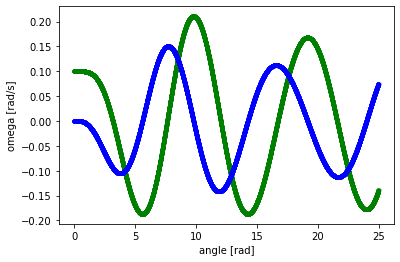

In [156]:
plt.plot(t, thetan1, "g.", label="theta, beta = 0.1 ω0, omega_F = 2/3 ω0")
plt.plot(t, omegan1, "b.", label="omega, beta = 0.1 ω0, omega_F = 2/3 ω0")
plt.xlabel ('angle [rad]')
plt.ylabel ('omega [rad/s]')

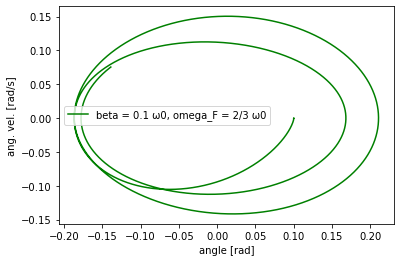

In [157]:
plt.plot(thetan1, omegan1, "g", label="beta = 0.1 ω0, omega_F = 2/3 ω0")
#plt.plot(thetan2, omegan2, "r", label="theta_o = 0.2")
#plt.plot(thetan3, omegan3, "g", label="theta_o = 0.3")
plt.xlabel ('angle [rad]')
plt.ylabel ('ang. vel. [rad/s]')
plt.legend()

In [151]:
plt.plot(t, thetan, "b.")
plt.plot(t, omegan, "r.")
plt.xlabel ('time [s]')
plt.ylabel ('angle [rad], ang. vel [rad/s]')

NameError: name 'thetan' is not defined

In [106]:
plt.plot(thetanss, omeganss, "g.")
plt.xlabel ('angle [rad]')
plt.ylabel ('omega [rad/s]')

NameError: name 'thetanss' is not defined

In [ ]:
thetan = ( thetan + np.pi ) % ( 2*np.pi ) - np.pi
thetanss = thetan[1000:]
omeganss = omegan[1000:]
